# **Statistical Data Analysis**

## <font face = "Times New Roman"> <b> Importing Libraries </b> </font>

In [ ]:
"""
    Data Processing Library
"""

import numpy as np
import pandas as pd
import random
import math
import functools
import scipy as sci

In [ ]:
"""
   To find time executed.
"""

import time

In [ ]:
"""
   Visualization Library
"""

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
"""
   Statistical Library imports
"""

from scipy import stats
from statistics import StatisticsError

In [ ]:
"""
   For Dimentionality Reduction.
"""

from sklearn.decomposition import TruncatedSVD 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

In [ ]:
try:

  """
     Connect google drive to google colab.
  """
  from google.colab import drive

except ImportError as error:
  print("Import Error")
  print(error)

## **Loading Data**

In [ ]:
"""
   Connect google drive to google colab.
"""

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
   Function to load dataset.
"""

def load_data(file_path):
  try:
    df = pd.read_csv(file_path)
    return df
  
  except FileNotFoundError as error:
    print("File Not Found Error during loading data")
    raise error

  except Exception as error:
      print("Exception Error: load_data")
      print(error)
      return ""

In [ ]:
"""
   Loading dataset.
"""

data = "/content/drive/MyDrive/er-output.csv"

df = load_data(data)

In [ ]:
"""
   displaying 1st 6 rows
   By default: n=5
"""

df.head(n = 6)

,Unnamed: 0,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,emotion
0,0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,...,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82,0
1,1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,...,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184,0
2,2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,...,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152,2
3,3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,...,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142,4
4,4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,...,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30,6
5,5,55,55,55,55,55,54,60,68,54,85,151,163,170,179,181,185,188,188,191,196,189,194,198,197,195,194,190,193,195,184,175,172,161,159,158,159,147,136,137,...,90,120,121,127,136,128,150,154,157,155,167,172,174,173,171,167,163,164,160,155,148,148,144,130,126,124,116,118,110,90,83,77,53,37,34,30,34,30,57,2


## **Data Cleaning**

### **Re-constructing DataFrame**

In [ ]:
"""
   Printing all column names.
"""

df.columns

Index(['Unnamed: 0', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4',
       'pixel_5', 'pixel_6', 'pixel_7', 'pixel_8',
       ...
       'pixel_2295', 'pixel_2296', 'pixel_2297', 'pixel_2298', 'pixel_2299',
       'pixel_2300', 'pixel_2301', 'pixel_2302', 'pixel_2303', 'emotion'],
      dtype='object', length=2306)

After displaying data, found that "Unnamed: 0" column is garbage column, therefore removing it from dataframe.

In [ ]:
df.drop(labels='Unnamed: 0', axis='columns', inplace=True, errors='raise')

To reset the index of dataframe.

In [ ]:
df.reset_index(drop=True, inplace=False).head(10)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,emotion
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82,0
1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,104,...,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184,0
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152,2
3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,188,...,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142,4
4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,38,...,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30,6
5,55,55,55,55,55,54,60,68,54,85,151,163,170,179,181,185,188,188,191,196,189,194,198,197,195,194,190,193,195,184,175,172,161,159,158,159,147,136,137,136,...,90,120,121,127,136,128,150,154,157,155,167,172,174,173,171,167,163,164,160,155,148,148,144,130,126,124,116,118,110,90,83,77,53,37,34,30,34,30,57,2
6,20,17,19,21,25,38,42,42,46,54,56,62,63,66,82,108,118,130,139,134,132,126,113,97,126,148,157,161,155,154,154,164,189,204,194,168,180,188,214,214,...,42,43,76,80,76,73,69,64,59,53,54,52,54,57,60,66,71,77,85,89,93,102,106,105,99,85,62,34,22,29,36,68,91,85,93,97,99,107,118,4
7,77,78,79,79,78,75,60,55,47,48,58,73,77,79,57,50,37,44,56,70,80,82,87,91,86,80,73,66,54,57,68,69,68,68,49,46,75,71,69,70,...,18,25,32,39,52,113,144,151,128,178,176,183,191,196,201,204,203,202,204,208,208,207,206,207,208,209,209,160,106,126,124,139,150,179,180,175,125,67,68,3
8,85,84,90,121,101,102,133,153,153,169,177,189,195,199,205,207,209,216,221,225,221,220,218,222,223,217,220,217,211,196,188,173,170,133,117,131,121,88,73,73,...,108,202,194,185,184,173,164,162,171,165,167,196,214,214,208,208,215,225,236,225,217,212,210,196,165,81,62,96,123,132,151,111,106,102,99,89,58,73,84,3
9,255,254,255,254,254,179,122,107,95,124,149,150,169,178,179,179,181,181,184,190,191,191,193,190,190,195,194,192,193,196,193,192,188,182,173,162,152,144,129,116,...,190,169,171,160,138,115,131,109,58,92,115,85,105,106,109,108,117,120,114,121,98,116,91,100,122,118,113,129,160,160,176,188,251,252,253,253,254,255,255,2


In [ ]:
df.shape

(35887, 2305)

In [ ]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,emotion
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82,0
1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,104,...,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184,0
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152,2
3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,188,...,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142,4
4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,38,...,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30,6


### **Missing Value**

In [ ]:
df.dropna(axis=0, how='any').head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,emotion
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82,0
1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,104,...,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184,0
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152,2
3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,188,...,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142,4
4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,38,...,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30,6


In [ ]:
df.dropna(axis=0, how='any').any().head()

pixel_0    True
pixel_1    True
pixel_2    True
pixel_3    True
pixel_4    True
dtype: bool

In [ ]:
df.fillna(0).any().head()

pixel_0    True
pixel_1    True
pixel_2    True
pixel_3    True
pixel_4    True
dtype: bool

In [ ]:
df.fillna(0).head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,emotion
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82,0
1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,104,...,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184,0
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152,2
3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,188,...,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142,4
4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,38,...,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30,6


In [ ]:
df.ffill(axis=1).head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303,emotion
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82,0
1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,104,...,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184,0
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152,2
3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,188,...,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142,4
4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,38,...,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30,6


## **Data Labels**

In [ ]:
emotion_label = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [ ]:
type(emotion_label)

dict

In [ ]:
print(emotion_label)

{0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}


## <font face = "Times New Roman"> <b> Useful Variable Creation </b> </font>

In [ ]:
"""
   Converting dataframe into numpy array.
"""

df_all = df.iloc[:,:2304]
df_all_numpy = df_all.to_numpy()

df_label = df["emotion"]
df_label_numpy = df_label.to_numpy()

In [ ]:
df_all.shape

(35887, 2304)

In [ ]:
df_all.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2264,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,79,...,20,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,104,...,150,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,225,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,188,...,124,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,38,...,18,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30


In [ ]:
print(df_all_numpy)
print("Shape: ", df_all_numpy.shape)

[[ 70  80  82 ... 106 109  82]
 [151 150 147 ... 193 183 184]
 [231 212 156 ...  88 110 152]
 ...
 [ 17  17  16 ... 154 133 113]
 [ 30  28  28 ...  35  30  28]
 [ 19  13  14 ... 189 199 201]]
Shape:  (35887, 2304)


In [ ]:
df_label.head()

0    0
1    0
2    2
3    4
4    6
Name: emotion, dtype: int64

In [ ]:
print(df_label_numpy)
print("Shape: ", df_label_numpy.shape)

[0 0 2 ... 0 3 2]
Shape:  (35887,)


In [ ]:
counts = df.groupby('emotion')["emotion"].count()
print(counts)
print(type(counts))

emotion
0    4953
1     547
2    5121
3    8989
4    6077
5    4002
6    6198
Name: emotion, dtype: int64
<class 'pandas.core.series.Series'>


## <font face = "Times New Roman"> <b> Emotions Selection </b> </font>

In [ ]:
def select_emotion(df_all, df_label, df, _emotion):

  """Select emotion type among all.

    Parameters
    ----------
    df_all : data-frame of shape (35887, 2304) 
             columns consists of pixel values (emotion column removed)

    df_label : consists of emotion label

    df : complete data-frame of shape (35887, 2305)

    _emotion : emotion type selected by the user

    Returns
    -------
    _data : all the data consisting the given emotion

    _data_numpy : numpy array to _data

    _data_label : consist all the data labels, of provided emotion 

    _data_label_numpy : numpy array of data label
    """


  try:

    _emotion = int(_emotion)

    _data = df_all[df["emotion"] == _emotion]
    _data_numpy = _data.to_numpy()

    _data_label = df_label[df["emotion"] == _emotion]
    _data_label_numpy = _data_label.to_numpy()

    return _data, _data_numpy, _data_label, _data_label_numpy

  except ValueError as error:
    raise error

  except TypeError as error:
    raise error

  except IndentationError as error:
    raise error

## <font face = "Times New Roman"> <b> Statistical Data Analysis </b> </font>

### <font face = "Times New Roman"> <b> Estimates Of Location </b> </font>

<font face="Times New Roman"> <h4>**Definition** </font></h4>

* To find `typical` or `central` value that best describes the data.
* To estimate `location` parameter for the distribution.

#### <font face = "Times New Roman"> <b> Mean </b> </font>

**Basic Theory** 

* **Definition:** `Mean` is sum of values divided by the total number of values.
* Also known as `Average`.

**Formula:**

To compute the mean for a set of $n$ values $x_1, x_2, ..., x_n$ is:

\begin{equation}
  \textrm{Mean} = \bar{x} = \frac{\sum ^n_{i=1} x_i}{n} \tag{i}
\end{equation}

Here, $\bar{x}$ : Represents mean of a sample from population.


In [ ]:
def find_mean(_data_numpy, n):

  """Finds mean of sample.

  This method calculates mean in three different ways:
  * without using library function
  * using numpy np.sum() function
  * via direct library function

  Parameters
  ----------
  _data_numpy : ndarray 
                All the pixel data of selected emotion

  n : str
      user difined, how to calculate mean

  Example
  -------
  >>> for _emotion_type = 3 (happiness)
  >>> n = 0, Time taken to calculate:  10.261376142501831, Mean of sample:  129.08117932140826
  >>> n = 1, Time taken to calculate:  0.021773815155029297, Mean of sample:  129.08117932140826
  >>> n = 2, Time taken to calculate:  0.030038833618164062, Mean of sample:  129.08117932140826

  Results
  -------
  mean : float
        mean of sample
  
  """

  try:

    print("Shape of selected numpy array: ", _data_numpy.shape)

    n = int(n)

    if n is 0:
      start = time.time()
      sum = 0
      for i in range(_data_numpy.shape[0]):
        for j in range(_data_numpy.shape[1]):
          sum += _data_numpy[i][j]
      mean = float(sum/(_data_numpy.shape[0]*_data_numpy.shape[1]))
      print("Time taken to calculate: ", time.time() - start)
      return mean

    elif n is 1:
      start = time.time()
      sum = np.sum(_data_numpy)
      mean = float(sum/(_data_numpy.shape[0]*_data_numpy.shape[1]))
      print("Time taken to calculate: ", time.time() - start)
      return mean

    elif n is 2:
      start = time.time()
      mean = _data_numpy.mean()
      print("Time taken to calculate: ", time.time() - start)
      return mean
    
    if n is not 0 or n is not 1 or n is not 2:
      print("Enter correct value")

  except StatisticsError as error:
    raise error
  
  except Exception as error:
    raise error

In [ ]:
n = input("Enter 0 (To find mean without any library function), Enter 1 (To find via using np.sum()), Enter 2 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_emotion_type = input("Enter the emotion type whose mean of pixel values you want to find: ")
print("Data Type of _emotion_type: ", type(_emotion_type))

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

mean = find_mean(_data_numpy, n)
print(type(mean))
print("Mean of sample: ", mean)

Enter 0 (To find mean without any library function), Enter 1 (To find via using np.sum()), Enter 2 (Via using Library Function): 1
Data Type of taken input:  <class 'str'>
Enter the emotion type whose mean of pixel values you want to find: 2
Data Type of _emotion_type:  <class 'str'>
Shape of selected numpy array:  (5121, 2304)
Time taken to calculate:  0.008991003036499023
<class 'float'>
Mean of sample:  135.42782010417343


In [ ]:
_data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2264,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,135,...,225,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152
5,55,55,55,55,55,54,60,68,54,85,151,163,170,179,181,185,188,188,191,196,189,194,198,197,195,194,190,193,195,184,175,172,161,159,158,159,147,136,137,136,...,64,90,120,121,127,136,128,150,154,157,155,167,172,174,173,171,167,163,164,160,155,148,148,144,130,126,124,116,118,110,90,83,77,53,37,34,30,34,30,57
9,255,254,255,254,254,179,122,107,95,124,149,150,169,178,179,179,181,181,184,190,191,191,193,190,190,195,194,192,193,196,193,192,188,182,173,162,152,144,129,116,...,251,190,169,171,160,138,115,131,109,58,92,115,85,105,106,109,108,117,120,114,121,98,116,91,100,122,118,113,129,160,160,176,188,251,252,253,253,254,255,255
17,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,43,57,66,74,76,76,82,87,97,72,30,60,68,78,72,63,46,80,80,35,39,48,65,90,89,53,17,37,44,82,94,21,22,51,71,80,82,79,79,83
21,174,51,37,37,38,41,22,25,22,24,35,51,70,83,98,113,119,127,136,149,149,141,125,107,77,50,30,21,9,38,96,79,72,87,60,23,25,43,29,24,...,159,143,145,161,175,202,207,208,223,230,232,234,234,206,165,176,183,187,187,189,175,140,93,79,75,54,22,15,5,0,19,14,11,12,22,23,12,7,11,16


In [ ]:
_data_label.head()

2     2
5     2
9     2
17    2
21    2
Name: emotion, dtype: int64

In [ ]:
print(type(_data_label))

<class 'pandas.core.series.Series'>


In [ ]:
_data_label = pd.DataFrame(_data_label)

In [ ]:
_data_label.head()

,emotion
2,2
5,2
9,2
17,2
21,2


#### <font face = "Times New Roman"> <b> Trimmed Mean </b> </font>

**Basic Theory**

* **Definition:** `Trimmed Mean` is the average of all values after dropping fixed number of extreme values (sorted values).
* Also known as `Truncated Mean`.
* Widely used to avoid the influence of outliers.
* It is a trade-off between the median and the mean.

**Formula:**

Here, $x_1 , x_2 , ..., x_n$ represents the sorted values, where $x_1$ is the smallest and $x_n$ is the largest value.

\begin{equation}
  \textrm{Trimmed Mean} = \bar{x} = \frac{\sum ^{n-p}_{i=p+1} x_{(i)}}{n-2p} \tag{ii}
\end{equation}

> <font color = "green"> <b> <i> Note: </i> </b></font> `2p` represent the omitted smallest and largest values.

In [ ]:
def find_trimmed_mean(_data_numpy, n, p):

  """To find the trimmed mean of the sample.

  This method finds trimmed mean using two ways.
  * without using library function
  * using library function

  Parameters
  ----------
  _data_numpy : ndarray
                numpy array of selected sample

  n : str
      select type of method to calucate trimmed mean

  p : str
      fraction of sample we want to omit from both side

  Example
  -------
  >>> for _emotion_type = 3, p = 0.05
  >>> n = 0, Time taken to calculate:  0.13057208061218262, Trimmed Mean of sample:  129.47220185935402
  >>> n = 1, Time taken to calculate:  0.1196749210357666, Trimmed Mean of sample:  129.47220185935402

  Results
  -------
  trimmed_mean : float
                 trimmed mean of sample

  Note
  ----
  This function 1st sorts the numpy array, then calculate

  """

  try:

    print("Shape of selected numpy array: ", _data_numpy.shape)

    n = int(n)
    p = float(p)
    _data_numpy = np.asarray(_data_numpy)
    start_time = time.time()
    _data_numpy = np.sort(_data_numpy).ravel()
    print("Time taken to sort the array: ", time.time() - start_time)

    if n is 0:
      start = time.time()
      num = _data_numpy.shape[0]
      lower_val = int(p * num)
      upper_val = num - lower_val

      if (lower_val > upper_val):
        raise ValueError("Proportion too big.")

      atmp = np.partition(_data_numpy, (lower_val, upper_val - 1), 0)
      sl = [slice(None)] * atmp.ndim
      sl[0] = slice(lower_val, upper_val)
      trim_mean = np.mean(atmp[tuple(sl)], axis=0)

      print("Time taken to calculate: ", time.time() - start)
      return trim_mean

    elif n is 1:
      start = time.time()
      trim_mean = stats.trim_mean(_data_numpy, p)
      print("Time taken to calculate: ", time.time() - start)
      return trim_mean
    
    if n is not 0 or n is not 1:
      print("Enter correct value")

  except StatisticsError as error:
    raise error
  
  except Exception as error:
    raise error


In [ ]:
n = input("Enter 0 (To find trimmed mean without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_emotion_type = input("Enter the type of emotion whose trimmed mean of pixel values you want to find: ")
print("Data Type of _emotion_type: ", type(_emotion_type))

p = input("Enter fraction of values you want to omit: ")
print("Data Type of taken value: ", type(p))

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)
print(type(_data_numpy))

trim_mean = find_trimmed_mean(_data_numpy, n, p)
print("Trimmed Mean of sample: ", trim_mean)

Enter 0 (To find trimmed mean without any library function), Enter 1 (Via using Library Function): 1
Data Type of taken input:  <class 'str'>
Enter the type of emotion whose trimmed mean of pixel values you want to find: 3
Data Type of _emotion_type:  <class 'str'>
Enter fraction of values you want to omit: 0.05
Data Type of taken value:  <class 'str'>
<class 'numpy.ndarray'>
Shape of selected numpy array:  (8989, 2304)
Time taken to sort the array:  1.4337027072906494
Time taken to calculate:  0.1196749210357666
Trimmed Mean of sample:  129.47220185935402


#### <font face = "Times New Roman"> <b> Median </b> </font>

**Basic Theory**

* **Definition:** `Median` is the middle number on a sorted list of the data.
* It depends only on values in center of the data.

**Formula:**

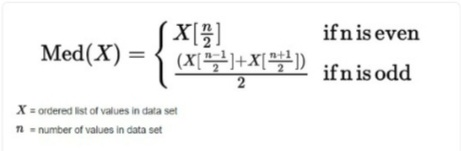

In [ ]:
def find_median(_data_numpy, n):

  """Finds median of sample

  Using two methods:
  * without library function
  * using library function

  It 1st checks the number of samples, then uses the formula accordingly.

  Parameters
  ----------
  _data_numpy : ndarray
                numpy array of all the data points of selected sample

  n : str
      method to calcuate

  Results
  -------
  median : float
           median of sample

  Example
  -------
  >>> for _emotion_type = 3
  >>> n = 0, Number of terms is even, Time taken to calculate:  0.00019073486328125, Median of sample:  77.0
  >>> n = 1, Time taken to calculate:  0.1251697540283203, Median of sample:  134.0

  Note
  ----
  This function 1st sorts the numpy array, then calculate
  """

  try:

    print("Shape of selected numpy array: ", _data_numpy.shape)

    n = int(n)
    _sort_time = time.time()
    _data_numpy = np.sort(_data_numpy).ravel()                # to flaten array
    print("Time taken to sort the array: ", time.time() - _sort_time)
    print("Data type of _data_numpy: ", type(_data_numpy))
    print(_data_numpy.shape)
   
    if n is 0:
      start = time.time()

      num = _data_numpy.size#.shape[0]*_data_numpy.shape[1]
      print(num)
      
      if num%2 is 0:
        print("Number of terms is even")
        ob_num = int(num/2)
        #median = np.where(_data_numpy == )
        median = _data_numpy[ob_num]
        print("Time taken to calculate: ", time.time() - start)
        return median

      elif num%2 is 1:
        print("Number of terms is odd")
        ob_num_1 = int((num-1)/2)
        observation_1 = _data_numpy[ob_num_1]
        ob_num_2 = int((num+1)/2)
        observation_2 = _data_numpy[ob_num_2]
        median = (observation_1 + observation_2)/2

        print("Time taken to calculate: ", time.time() - start)
        return median

    elif n is 1:
      start = time.time()
      median = np.median(_data_numpy)
      print("Time taken to calculate: ", time.time() - start)
      return median
    
    if n is not 0 or n is not 1:
      print("Enter correct value")

  except StatisticsError as error:
    raise error
  
  except Exception as error:
    raise error



In [ ]:
n = input("Enter 0 (To find median without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_emotion_type = input("Enter the type of emotion whose median of pixel values you want to find: ")
print("Data Type of _emotion_type: ", type(_emotion_type))

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)
print(type(_data_numpy))
print(_data_numpy.size)

median = find_median(_data_numpy, n)
print("Median of sample: ", median)

Enter 0 (To find median without any library function), Enter 1 (Via using Library Function): 0
Data Type of taken input:  <class 'str'>
Enter the type of emotion whose median of pixel values you want to find: 3
Data Type of _emotion_type:  <class 'str'>
<class 'numpy.ndarray'>
20710656
Shape of selected numpy array:  (8989, 2304)
Time taken to sort the array:  1.170332431793213
Data type of _data_numpy:  <class 'numpy.ndarray'>
(20710656,)
20710656
Number of terms is even
Time taken to calculate:  7.104873657226562e-05
Median of sample:  77


### <font face = "Times New Roman"> <b> Estimates Of Variability </b> </font>

<font face="Times New Roman"> <h4>**Definition** </font></h4>

* `Variability` between samples refers to `range` of values differs between samples.
* Also refered as `Dispersion`.
* It measures whether data values are `tighly clustered` or `spread`.

#### <font face = "Times New Roman"> <b> Mean Absolute Deviation </b> </font>

**Basic Theory**

* `Deviations` tell us how dispersed the data is around the central value.
* `MAD` is the mean of absolute deviation of data points from mean.

**Formula**

\begin{equation}
    \textrm{Mean absolute deviation} = \frac{\sum^n_{i=1} |x_i-\bar{x}|}{n} \tag{iv}\\
\end{equation}

where, $\bar{x}$ is the sample mean, n is total number of observations and $x_1$, $x_2$, .......$x_n$ are data points

In [ ]:
def find_mad(_data):
  """Finds mean absolute deviation of sample.

  Parameters
  ----------
  _data : dataframe of given sample or population

  Results
  -------
  mad_row : Series
            Computes MAD value accross each row in provided dataframe
  """

  try:

    print("Shape of selected numpy array: ", _data.shape)
    print("Data type of _data: ", type(_data))
   
    start = time.time()
    #mad_col = _data_numpy.mad()
    mad_row = _data.mad(axis=1, skipna=False)
    print("Time taken to calculate: ", time.time() - start)
    return mad_row
  
  except StatisticsError as error:
    raise error
  
  except Exception as error:
    print(error)
    raise error


In [ ]:
"""
    Printing Mean Absolute Deviation along each row of data-frame
"""

mad_row = find_mad(df_all)
print(mad_row)

Shape of selected numpy array:  (35887, 2304)
Data type of _data:  <class 'pandas.core.frame.DataFrame'>
Time taken to calculate:  1.0663831233978271
0        45.270243
1        31.470421
2        63.283033
3        50.921905
4        62.357557
           ...    
35882    25.283086
35883    24.239638
35884    57.482364
35885    39.542430
35886    50.364638
Length: 35887, dtype: float64


In [ ]:
print(type(mad_row))

<class 'pandas.core.series.Series'>


In [ ]:
_emotion_type = input("Enter the type of emotion whose MAD of pixel values you want to find: ")
print("Data Type of _emotion_type: ", type(_emotion_type))

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

mad_row = find_mad(_data)
print("Mean Absolute Deviation of sample (row): \n", mad_row)

Enter the type of emotion whose MAD of pixel values you want to find: 3
Data Type of _emotion_type:  <class 'str'>
Shape of selected numpy array:  (8989, 2304)
Data type of _data:  <class 'pandas.core.frame.DataFrame'>
Time taken to calculate:  0.24744677543640137
Mean Absolute Deviation of sample (row): 
 7        63.275814
8        50.358728
14       47.699219
16       41.996085
24       35.523297
           ...    
35867    52.908709
35869    40.501366
35878    55.990212
35883    24.239638
35885    39.542430
Length: 8989, dtype: float64


#### <font face = "Times New Roman"> <b> Variance and Standard Deviation </b> </font>

**Basic Theory**



**Variance:**

* `Variance` is defined as the average of squared deviations.
* Variance of population is denoted by σ<sup>2</sup>
* Variance of sample is denoted by s<sup>2</sup>
* **Formula:**

\begin{equation}
    \textrm{Variance} = s^2 = \frac{\sum^n_{i=1} (x_i-\bar{x})^2}{n-1} \tag{v}\\
\end{equation}

Here, $x_1$, $x_2$, $x_3$, ......, $x_n$ are values in dataset, $\bar{x}$ : Represents mean of a sample and n is total number of observations of sample.


**Standard Deviation**

* `Standard deviation` is the square root of the variance.
* It measures spread around the mean.
* Standard deviation is on same scale as original data, therefore it is easier to interpret.
* **Formula:**

\begin{equation}
    \textrm{Standard Deviation} = s = \sqrt{Variance}\tag{vi}\\
\end{equation}

> <font color = "green"> <b> <i> Note: </i> </b></font> `Variance` and `Standard Deviation` are sensitive to **outliers** because they are based on the squared deviations.

In [ ]:
def find_var_std(_data_numpy, n):

  """To find variance and standard deviation.

  This function consists of two method to calculate:
  * without library function
  * via library function

  Parameters
  ----------
  _data_numpy : darray
                numpy array of selected sample

  n : str
      select method to calucate variance and stanadard deviation

  Example
  -------
  >>> for _emotion_type = 3
  >>> n = 0, Time taken to calculate:  0.7255523204803467, Variance of sample:  [4645.25424363878, 3525.1757720193746, 3197.1766355538075... 1207.6763326385874, 2137.4093603440274], Standard Deviation of sample:  [68.15610203 59.37319068 56.54358174 ... 68.27522534 34.75163784 46.23212477]
  >>> n = 1, Time taken to calculate:  0.2692246437072754, Variance of sample:  [4645.25424364 3525.17577202 3197.17663555 ... 4661.50639513 1207.67633264 2137.40936034], Standard Deviation of sample:  [68.15610203 59.37319068 56.54358174 ... 68.27522534 34.75163784 46.23212477]

  Returns
  -------
  var : numpy.ndarray
        Returns variance along each row

  std : numpy.ndarray
        Returns standard deviation along each row

  """

  try:

    n = int(n)

    print("Shape of selected numpy array: ", _data_numpy.shape)
    print("Data type of _data_numpy: ", type(_data_numpy))

    if n is 0:

      start = time.time()

      
      """

      means = []
      for row in _data_numpy:
        mean = row.mean()
        means.append(mean)

      squared_error = []
      for row, mean in zip(_data_numpy, means):
        sq_error = (row - mean)**2
        squared_error.append(sq_error)

      var = []
      for row in squared_error:
        variance = row.mean()
        var.append(variance)
      """

      means = [row.mean() for row in _data_numpy]
      squared_error = [(row - mean)**2 for row, mean in zip(_data_numpy, means)]
      var = [row.mean() for row in squared_error]

      std = np.sqrt(var)

      print("Time taken to calculate: ", time.time() - start)

      return var, std

    if n is 1:

      start = time.time()
      var = _data_numpy.var(axis=1)
      std = _data_numpy.std(axis=1)
      print("Time taken to calculate: ", time.time() - start)
      return var, std

    if n is not 1 or n is not 0:
      print("Enter correct value")
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To find variance & std without any library function), Enter 1 (Via using Library Function): ")
var, std = find_var_std(df_all_numpy, n)
print("Variance of sample: ", var)
print("Standard Deviation of sample: ", std)

In [ ]:
n = input("Enter 0 (To find variance & std without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_emotion_type = input("Enter the type of emotion whose variance and standard deviation of pixel values you want to find: ")
print("Data Type of _emotion_type: ", type(_emotion_type))

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

var, std = find_var_std(_data_numpy, n)

print()
print("Variance of sample: ", var)
print("Standard Deviation of sample: ", std)


Enter 0 (To find variance & std without any library function), Enter 1 (Via using Library Function): 1
Data Type of taken input:  <class 'str'>
Enter the type of emotion whose variance and standard deviation of pixel values you want to find: 3
Data Type of _emotion_type:  <class 'str'>
Shape of selected numpy array:  (8989, 2304)
Data type of _data_numpy:  <class 'numpy.ndarray'>
Time taken to calculate:  0.2692246437072754

Variance of sample:  [4645.25424364 3525.17577202 3197.17663555 ... 4661.50639513 1207.67633264
 2137.40936034]
Standard Deviation of sample:  [68.15610203 59.37319068 56.54358174 ... 68.27522534 34.75163784
 46.23212477]


In [ ]:
print(type(var))
print(type(std))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### <font face = "Times New Roman"> <b> Estimates Based on Percentiles </b> </font>

#### <font face = "Times New Roman"> <b> Range </b> </font>

**Basic Theory**

* Statistics based on sorted data.
* `Range` is the difference between the largest and the sortest value.
* It is extremely sensitive to `outliers`.
* Not usefull as a general measure of data.

**Formula:**

\begin{equation}
  \textrm{Range} = Maximum Value - Minimum Value \tag{vii}
\end{equation}

There is no need to calculate range of pixel values as we already know it ranges from 0-255 where, 0 is taken as white and 255 is taken as black.

#### <font face = "Times New Roman"> <b> Percentile </b> </font>

**Basic Theory**

* `Percentile` is the estimate of propotions of data that should fall above or bellow.
* The dataset should be sorted.

> <font color = "green"> <b> <i> Note: </i> </b></font> Median is the same thing as the 50<sup>th</sup> percentile.

> <font color = "green"> <b> <i> Note: </i> </b></font> Percentile is same as quantile.


In [ ]:
def find_percentile(_data_numpy, _percent, ax, n):

  """To find percentile.

  This function consists of two method to calculate:
  * without library function
  * via library function

  Parameters
  ----------
  _data_numpy : ndarray
                numpy array of selected sample

  _percent : str
             propotion of data that should fall above or bellow

  ax : str
       axis along which we have to estimate

  n : str
      select method to calucate variance and stanadard deviation

  Example
  -------
  >>> for _emotion_type = 3, _percent = 5, along row
  >>> n = 0, Time taken to calculate:  0.02375483512878418, Percentile of sample:  [  1.8   3.    3.  ... 234.8 238.4 239. ]
  >>> n = 1, Time taken to calculate:  1.5285449028015137, Percentile of sample:  [  0.   0.   0. ... 185. 188. 191.]

  Returns
  -------
  p : list
      percentile

  """

  try:

    n = int(n)
    ax = int(ax)
    _percent = int(_percent)
    _data_numpy = np.sort(_data_numpy)
    print("Shape of selected numpy array: ", _data_numpy.shape)

    if n is 0:

      start = time.time()

      if not _data_numpy.any():
        return None

      k = (_data_numpy.shape[ax]-1) * (_percent/100)
      floor_op = math.floor(k)
      ceil_op = math.ceil(k)

      if floor_op is ceil_op:
        return _data_numpy[int(k)]

      d0 = _data_numpy[int(floor_op)] * (ceil_op - k)
      d1 = _data_numpy[int(ceil_op)] * (k - floor_op)
      val = d0 + d1

      print("Time taken to calculate: ", time.time() - start)

      return val

    if n is 1:
    
      start = time.time()
      p = np.percentile(_data_numpy, _percent, axis=ax)
      print("Time taken to calculate: ", time.time() - start)
      return p

    if n is not 1 or n is not 0:
      print("Enter correct value")
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To find percentile without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

_emotion_type = input("Enter the type of emotion whose percentile of pixel values you want to find: ")
print("Data Type of _emotion_type: ", type(_emotion_type))

_percent = input("Enter percent you want to find: ")

ax = input("Enter 0 (To find along row), 1 (To find along column): ")

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

percentile = find_percentile(_data_numpy, _percent, ax, n)
print("Percentile of sample: ", percentile)

Enter 0 (To find percentile without any library function), Enter 1 (Via using Library Function): 1
Data Type of taken input:  <class 'str'>
Enter the type of emotion whose percentile of pixel values you want to find: 3
Data Type of _emotion_type:  <class 'str'>
Enter percent you want to find: 50
Enter 0 (To find along row), 1 (To find along column): 1
Shape of selected numpy array:  (8989, 2304)
Time taken to calculate:  1.5672721862792969
Percentile of sample:  [ 82.  194.  109.5 ...  86.  178.   92. ]


#### <font face = "Times New Roman"> <b> Interquartile Range (IQR) </b> </font>

**Basic Theory**

* `Interquartile Range` is the difference between 25<sup>th</sup> percentile and 75<sup>th</sup> percentile of data.

The Figure represent the simple demostration of `IQR`:

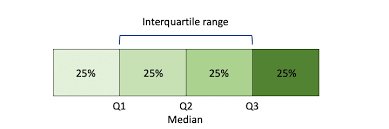

**Formula:**

\begin{equation}
  \textrm{Interquartile Range (IQR)} = Q_3 - Q_1 \tag{viii}
\end{equation}

Here, given 2n (even) or 2n+1 (odd) number of values.

* first quartile `Q1` = median of the n smallest values
* third quartile `Q3` = median of the n largest values
* second quartile `Q2` = same as the median

In [ ]:
def find_iqr(_data, _data_numpy, ax, n):

  try:

    n = int(n)
    ax = int(ax)

    if n is 0:

      _data_numpy = np.sort(_data_numpy)
      print("Shape of selected numpy array: ", _data_numpy.shape)

      start = time.time()

      if not _data_numpy.any():
        return None
        
      q3 = find_percentile(_data_numpy, 75, ax, n)
      q1 = find_percentile(_data_numpy, 25, ax, n)
      
      iqr = q3 - q1
      print("Time taken to calculate: ", time.time() - start)
      
      return iqr

    if n is 1:

      start = time.time()
      iqr = _data.quantile(axis=ax)
      print("Time taken to calculate: ", time.time() - start)

      return iqr

    if n is not 0 or n is not 1:
      print("Enter correct value")
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


In [ ]:
n = input("Enter 0 (To find iqr without any library function & in numpy array), Enter 1 (Via using Library Function & in dataframe): ")
print("Data Type of taken input: ", type(n))

_emotion_type = input("Enter the type of emotion whose percentile of pixel values you want to find: ")
print("Data Type of _emotion_type: ", type(_emotion_type))

ax = input("Enter 0 (To find along row), 1 (To find along column): ")

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

iqr = find_iqr(_data, _data_numpy, ax, n)
print("IQR of sample: ", iqr)

Enter 0 (To find iqr without any library function & in numpy array), Enter 1 (Via using Library Function & in dataframe): 1
Data Type of taken input:  <class 'str'>
Enter the type of emotion whose percentile of pixel values you want to find: 3
Data Type of _emotion_type:  <class 'str'>
Enter 0 (To find along row), 1 (To find along column): 1
Time taken to calculate:  0.6452109813690186
IQR of sample:  7         82.0
8        194.0
14       109.5
16       117.0
24        81.0
         ...  
35867    105.0
35869    159.5
35878     86.0
35883    178.0
35885     92.0
Name: 0.5, Length: 8989, dtype: float64


In [ ]:
print(type(iqr))

<class 'numpy.ndarray'>


### <font face = "Times New Roman"> <b> Exploring Binary and Categorical Data </b> </font>

#### <font face = "Times New Roman"> <b> Mode </b> </font>

* `Mode` is the value that appear most offten in dataset.
* It is a summay statistic for **categorical data** i.e. grouped data or set of values representing a possible categories.
* It is not used for **numeric data** i.e. data expressed in number scale.

In [ ]:
def find_mode(counts, n):

  """Finds model of sample.

  This function consists of two method to calculate:
  * without library function
  * via library function

  Parameters
  ----------
  counts : list
           number of entries each emotion type has

  n : str
      select method to calucate iqr range

  Example
  -------
  >>> for n = 0, Time taken to calculate:  0.0002598762512207031, Mode of sample:  [3, 8989]

  Returns
  -------
  mode : list
         emotion along with its number of values

"""

  try:

    n = int(n)

    print("Shape of selected numpy array: ", counts.shape)
    print("Data type of _data_numpy: ", type(counts))

    if n is 0:

      start = time.time()
      max = counts[0]
      num = 0
      for row in counts:
        num +=1
        if row > max:
          mode = num-1
          max = row

      list = [mode, max]

      print("Time taken to calculate: ", time.time() - start)
      return list

    if n is 1:
   
      start = time.time()
      mode = counts.mode(dropna=True)
      print("Time taken to calculate: ", time.time() - start)
      return mode

    if n is not 0 or n is not 1:
      print("Enter correct value")
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error

In [ ]:
n = input("Enter 0 (To find mode without any library function), Enter 1 (Via using Library Function): ")
print("Data Type of taken input: ", type(n))

mode = find_mode(counts, n)
print("Mode of sample: ", mode)

Enter 0 (To find mode without any library function), Enter 1 (Via using Library Function): 1
Data Type of taken input:  <class 'str'>
Shape of selected numpy array:  (7,)
Data type of _data_numpy:  <class 'pandas.core.series.Series'>
Time taken to calculate:  0.0008990764617919922
Mode of sample:  0     547
1    4002
2    4953
3    5121
4    6077
5    6198
6    8989
dtype: int64


In [ ]:
def plot_boxplot(counts):

  try:

    start = time.time()
    plt.boxplot(counts)
    print("Time taken to plot: ", time.time() - start)

  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error

Time taken to plot:  0.03391671180725098


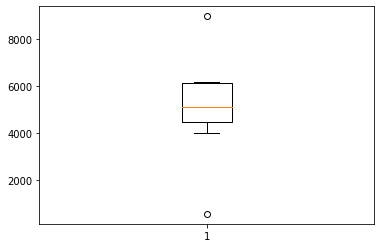

In [ ]:
plot_boxplot(counts)

#### <font face = "Times New Roman"> <b> Probability </b> </font>

* `Probability` of an event will happen is how likly the event occurs again and again if tested again and again.
* **Formula:**

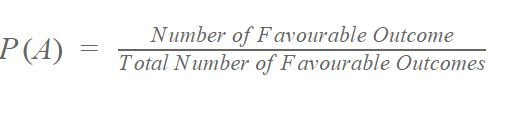

In [ ]:
def find_prob(counts):

  """To find probability of emotion type to be predicted.

  Parameters
  ----------
  counts : list
           number of entries each emotion type has

  Example
  -------
  >>> Time taken to calculate:  2.6702880859375e-05, Probability of each emotion type:  [0.13801655195474685, 0.01524228829381113, 0.14269791289324826, 0.25048067545350683, 0.1693370858528158, 0.11151670521358709, 0.17270878033828405]
  
  Returns
  -------
  prob : list
         probability of ouccurance of each emotion.
  
  """

  try:

    print("Shape of selected numpy array: ", counts.shape)
    print("Data type of _data_numpy: ", type(counts))

    start = time.time()
    sum = 0
    for row in counts:
      sum += row
    probability = []
    for row in counts:
      p = row/sum
      probability.append(p)
    print("Time taken to calculate: ", time.time() - start)
    return probability
  
  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error

In [ ]:
prob = find_prob(counts)
print("Probability of each emotion type: ", prob)

Shape of selected numpy array:  (7,)
Data type of _data_numpy:  <class 'pandas.core.series.Series'>
Time taken to calculate:  2.6702880859375e-05
Probability of each emotion type:  [0.13801655195474685, 0.01524228829381113, 0.14269791289324826, 0.25048067545350683, 0.1693370858528158, 0.11151670521358709, 0.17270878033828405]


In [ ]:
print(prob[0])

0.13801655195474685


#### <font face = "Times New Roman"> <b> Expected Value </b> </font>

* `Expected Value` is calculated by:

   i) Multiply each outcome by its probability of occurrence.

   ii) Sum these values.
* It is a form of `weighted mean`.
* This concept is basically used for **categorical data**.
* **Formula:**



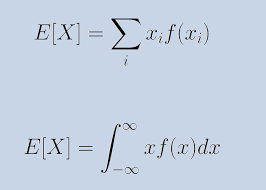

Here, $x_1$, $x_2$, ......, $x_i$ are data and f($x_i$) are the probability of outcomes and E[X]: Represents Expected Value

In [ ]:
def find_ev(counts, prob):

  """Finds expected value.

  Parameters
  ----------
  counts : list
           number of entries each emotion type has

  prob : list
         probability of each emotion

  Example 
  -------
  >>> Time taken to calculate:  3.528594970703125e-05
  >>> Expected Value of each emotion type:  [683.5959818318612, 8.337531696714688, 730.7560119263244, 2251.570791651573, 1029.0614707275615, 446.2898542647755, 1070.4490205366844]
  >>> Total Expected value:  6220.060662635495

  Returns
  -------
  ev : list
       expected value of each emotion 

  total_ev : float
             expected value of comeplete sample

  """

  try:

    print("Shape of selected numpy array: ", counts.shape)
    print("Data type of _data_numpy: ", type(counts))

    start = time.time()

    ev = []
    num = 0
    for row in counts:
      val = row * prob[num]
      num += 1
      ev.append(val)

    total_ev = 0
    for row in ev:
      total_ev += row
    
    print("Time taken to calculate: ", time.time() - start)
    return ev, total_ev

  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error

In [ ]:
print(type(total_ev))

<class 'float'>


In [ ]:
ev, total_ev = find_ev(counts, prob)
print("Expected Value of each emotion type: ", ev)
print("Total Expected value: ", total_ev)

Shape of selected numpy array:  (7,)
Data type of _data_numpy:  <class 'pandas.core.series.Series'>
Time taken to calculate:  3.528594970703125e-05
Expected Value of each emotion type:  [683.5959818318612, 8.337531696714688, 730.7560119263244, 2251.570791651573, 1029.0614707275615, 446.2898542647755, 1070.4490205366844]
Total Expected value:  6220.060662635495


### <font face = "Times New Roman"> <b> Correlation </b> </font>

#### <font face = "Times New Roman"> <b> Definition </b> </font>


`Correlation` is the measure which is used to know how similar the two variables are.


#### <font face = "Times New Roman"> <b> Correlation Coefficient </b> </font>

* It is used to measure the strength of correlation between two variables.
* **Range:** 1 to -1
* Values above 1 or less than -1 are concluded as error in calculation.
* `Negative Correlation` indicates that if one variable increases the other decreases or vice versa.
* `Positive Correlation` indicates that both are similar i.e. if one increases the other one also increases and vice versa.
* `0` correlation means that the samples shows no relation between each other.



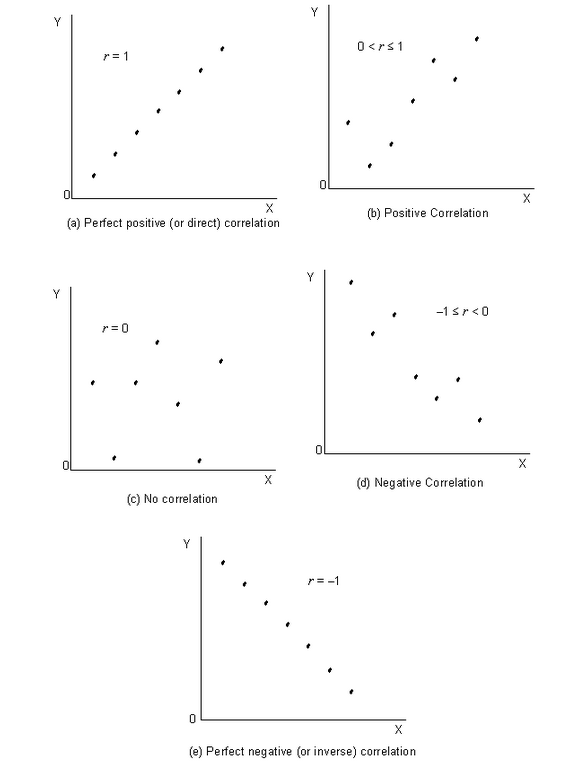

#### <font face = "Times New Roman"> <b> Correlation Matrix </b> </font>


A table where variables are shown as rows and columns and the cell values are the correlations between the variables is known as `Correlation Matrix`.



In [ ]:
def corr_matrix(df_all):

  """To find correlation matrix.

  Parameters
  ----------
  df_all : dataframe
           
  Example
  -------
  >>> Time taken to calculate:  356.91664814949036

  Returns
  -------
  corr : pandas.core.frame.DataFrame
         correlation matrix
  """

  try:
    start = time.time()
    corr = df_all.corr() 
    print("Time taken to calculate: ", time.time() - start)
    return corr

  except StatisticsError as error:
    raise error
  
  except Exception as error:
    print()
    print(error)
    raise error


In [ ]:
corr = corr_matrix(df_all)
print(corr)

Time taken to calculate:  356.91664814949036
             pixel_0   pixel_1   pixel_2  ...  pixel_2301  pixel_2302  pixel_2303
pixel_0     1.000000  0.955827  0.876732  ...    0.211353    0.221400    0.229288
pixel_1     0.955827  1.000000  0.950985  ...    0.205512    0.214866    0.221307
pixel_2     0.876732  0.950985  1.000000  ...    0.200541    0.208581    0.213367
pixel_3     0.808744  0.874277  0.949891  ...    0.194277    0.201106    0.204598
pixel_4     0.736135  0.800216  0.867078  ...    0.186913    0.193363    0.195504
...              ...       ...       ...  ...         ...         ...         ...
pixel_2299  0.194096  0.189932  0.186712  ...    0.879267    0.826704    0.777980
pixel_2300  0.202676  0.197426  0.194412  ...    0.951363    0.884227    0.832282
pixel_2301  0.211353  0.205512  0.200541  ...    1.000000    0.951975    0.885566
pixel_2302  0.221400  0.214866  0.208581  ...    0.951975    1.000000    0.956888
pixel_2303  0.229288  0.221307  0.213367  ...    0.88

In [ ]:
print(type(corr))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
def corr_plot(corr, cmap_ar):

  """To plot correlation.

  Parameters
  ----------
  corr : dataframe
         of correlation matrix
  
  cmap_ar : str
            type of heatmap to be plotted
  
  Example
  -------
  >>> Enter the cmap style from the above arrguments: 7
  >>> Color plotted:  Blues_r   
  >>> Time taken to plot:  6.074030876159668

  Returns
  -------
  Graph

  """

  try:
    start = time.time()
    plt.figure(figsize=(16, 16))
    sns.heatmap(corr, vmin=-1, vmax=1, cmap=cmap_ar) 
    sns.set(font_scale=2,style='white')
    plt.tight_layout()
    
    plt.title('Heatmap correlation')
    plt.show()
    print("Time taken to plot: ", time.time() - start)

  except AttributeError as error:
    print("Attribute Error Occured.")
    print("The error is ", error)
    
  except ValueError as error:
    print("Value Error Occured.")
    print("The error is ", error)

Enter the cmap style from the above arrguments: 7
Color plotted:  Blues_r


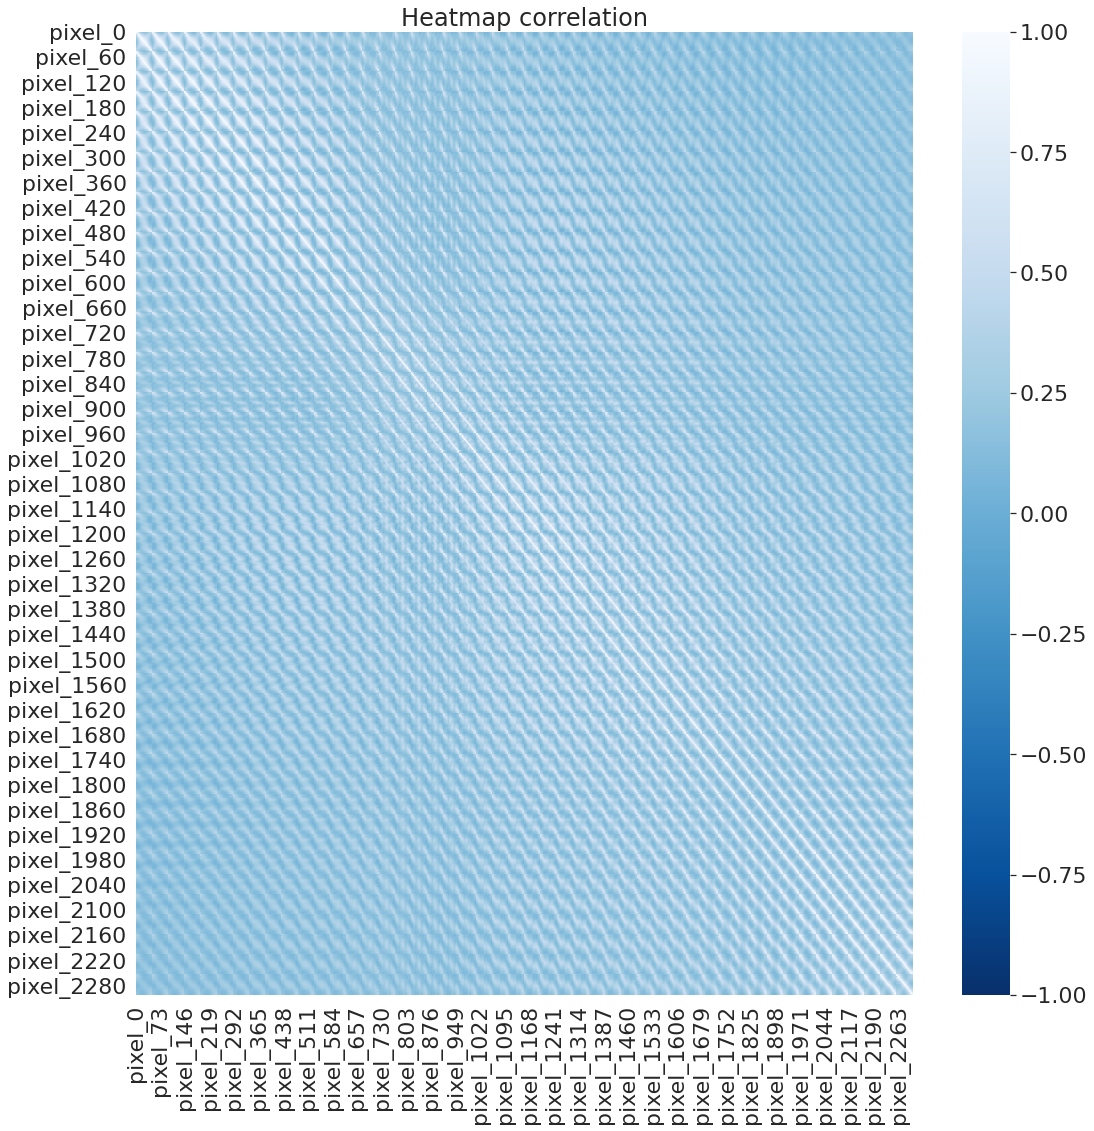

Time taken to plot:  6.074030876159668


In [ ]:
val = ['coolwarm', sns.diverging_palette(20, 220, as_cmap=True), 'Blues', 'YlGnBu', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

n = input("Enter the cmap style from the above arrguments: ")
n = int(n)
cmap_ar = val[n]
print("Color plotted: ", val[n])

corr_plot(corr, cmap_ar)

#### <font face = "Times New Roman"> <b> Pearson’s Correlation Coefficient </b> </font>

Steps to calculate:

* Calculate covariance of the given two varaibles.
* Calculate standard deviation of both variables.
* Put in formula.

**Formula:**

\begin{equation}
    r = \frac{\sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y} \tag{xi}
\end{equation}


### <font face = "Times New Roman"> <b> T-Test </b> </font>

#### <font face = "Times New Roman"> <b> Definition </b> </font>

* The `T-test` i.e. `Student’s T Test` compares two **means** and tells us if they are different from each other.
* It tells whether two samples have been drawn from same sample or not.
* It tell's how significant our result is, more specifically it tells whether it happened by chance or not.

#### <font face = "Times New Roman"> <b> T-Values and Degrees of Freedom </b></font>

* `T-Value` is the ratio of the difference between the mean of the two sample sets and the variation that exists within the sample sets.
* T-Value is also called `T-Score`.
* Large t-score indicates that the groups are different.
* Small t-score indicates that the groups are similar.
* `Degree Of Freedom` are the values that has a freedom to vary.
* **Formula of Degree of Freedom:** df = n<sub>x</sub> + n<sub>y</sub> - 2

#### <font face = "Times New Roman"> <b> Normal Distribution </b></font>

* It has a `bell-shaped` density curve.
* The density curve is symmetrical and centered about `mean(μ)`. It determines the **peak** of the curve.
* Data spread it determined by `standard deviation(sigma-σ)` i.e. it is a measure of **variability**. It determines how far the data falls from the mean.

The density curve is as follows: 

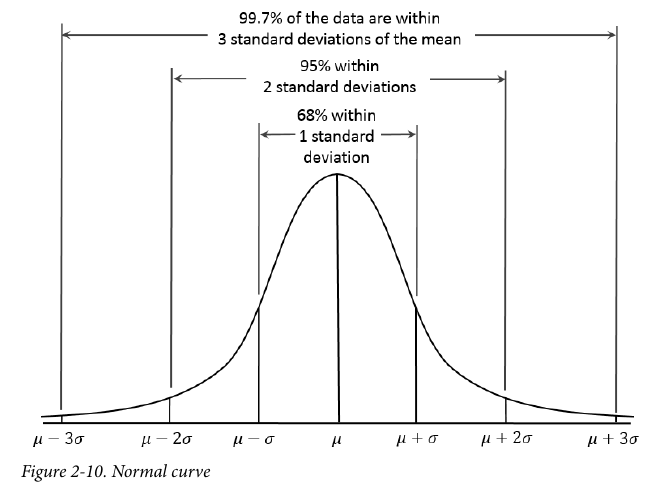

#### <font face = "Times New Roman"> <b> Standardization (Normalization, z-Scores) </b></font>

* The process of putting different variables to a same scale is known as `Standardization`. 
* Also called `Normalization`.
* It allows us to compare scores between different types of variables.
* **Formula:**

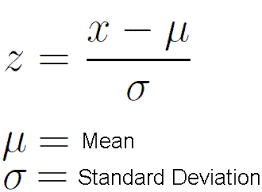


* Result of this formula is known as `z-score`.
* `z-score` tells the overall data lies compared to overall population.

> <font color='green'><b> Note:</b></font> The higher (or lower) the Z-score, the more unlikely the result is to happen by chance and the more likely the result is meaningful.<sup>[1]</sup>

#### <font face = "Times New Roman"> <b> p-Value and alpha </b><font>

##### **Significance Level-Alpha**

* It is a probability of rejecting the null hypothesis when it is true.

* Drawing a two tailed graph for alpha = 0.05 and alpha = 0.01:<sup>[1]</sup>

**Some Keypoints:**
* We need to shade 5% or 1% of graph that is furthest from null hypothesis(since we are rejecting).
* The sample mean for the given distribution is 330.6.

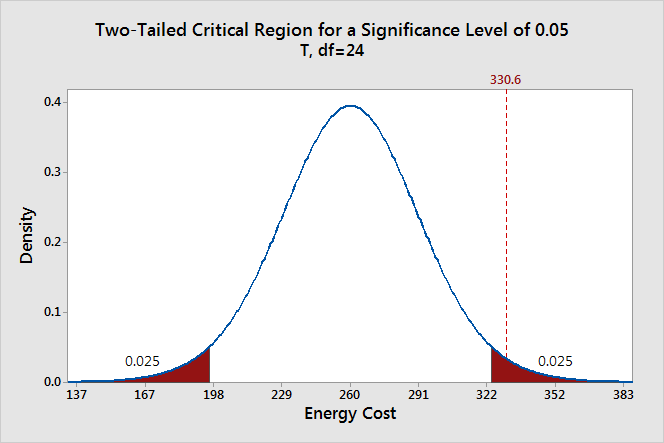

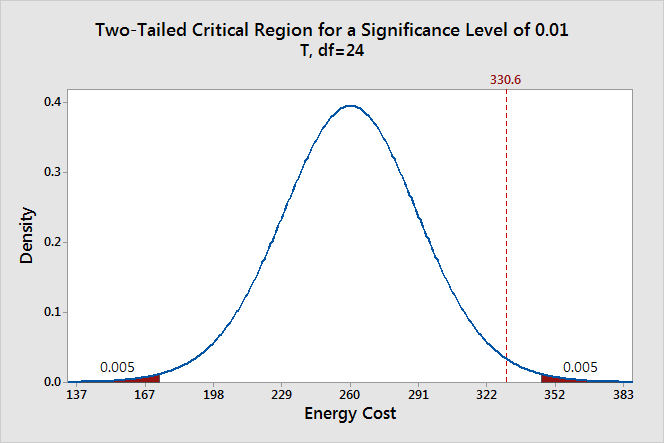

**Observation:**

* For the above two-tailed test, the critical region (the shaded part) lies equidistant from the null hypothesis value.
* Sample mean 330.6 is significant in case for 5% significance but not for the case of 1% significance level.

**Conclusion**

* We'll reject null hypothesis for 5% significance level.
* Fail to reject null hypothesis for 1% significance level.

##### **P-Value**

* The probability that the results from our sample data occurred by chance is known as `p-value`.
* Lower p-values are good because they indicate that the data does not occur by chance.
* *Example:* p-value = 0.01 indicates that their is only 1% probability that the data occured by chance.
* If the observed p-value is less than alpha, then the results are statistically significant.

#### <font face = "Times New Roman"> <b> Type's Of T-Test </b></font>

##### **Student's T-Test**

* Sample's are Independent.
* Sample's are drawn from Gaussian Distribution.
* Size of each sample must be same.
* Sample's have same variance.
* Sample's have different mean.
* Values of one sample does not have any effect to values of other sample.

**Formula:**

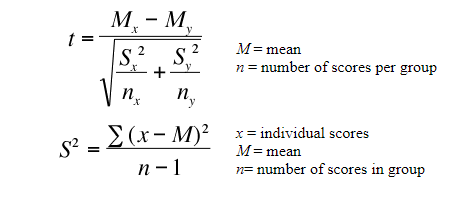

##### **Paired Student's T-Test**

* Sample's are Dependent.
* They may be from same population.
* Used to check whether the difference of means of two samples are zero or not.
* They have unequal variance.
* Similar to Student's T-Test they are also drawn from Gaussian Distribution.
* Values of one sample effect the values of other sample.

**Formula:**

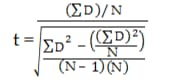

#### <font face = "Times New Roman"> <b> Hypothesis </b></font>

* Hypothesis testing is used to assess the probability of a hypothesis by using sample data.
* An assumption is made looking into population and test are preformed according to it.

##### **Null Hypothesis**

* It stats/assumnes that their is no difference between population characteristics (mean, propotion).
* It is denoted by H<sub>0</sub>.

##### **Alternative Hypothesis**

* It claims that the population is contradictory to null hypothesis. Hence, reject null hypothesis.
* It is denoted by H<sub>1</sub>.

#### <font face = "Times New Roman"> <b> Procedure </b></font>

* Determine a null and alternate hypothesis.
* Collect sample data.
* Determine a confidence interval and degrees of freedom.
* Calculate the t-statistic.
* Calculate the critical t-value from the t distribution.
* Compare the critical t-values with the calculated t statistic.

#### <font face = "Times New Roman"> <b> Creating Samples </b></font>

In [ ]:
_emotion_type = input("Enter type of emotion which needs to be tested: ")

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

sample_1 = _data_numpy.copy()

sample_1

In [ ]:
sample_1.shape

In [ ]:
intensity_plot(sample_1)

In [ ]:

_emotion_type = input("Enter type of emotion which needs to be tested: ")

_data, _data_numpy, _data_label, _data_label_numpy = select_emotion(df_all, df_label, df, _emotion_type)

sample_2 = _data_numpy.copy()

sample_2

In [ ]:
sample_2.shape

In [ ]:
intensity_plot(sample_2)

#### <font face = "Times New Roman"> <b> T-Test Implementation </b></font>

<h5> <font face = "Times New Roman"> <b> Creating some user defined function for Dependent Samples </b></font></h5>

In [ ]:
"""
    To find sum squared difference and sum difference between observations.

"""

def find_diff(sample1, sample2):
  sq_diff = sum([(sample1[i] - sample2[i]) ** 2 for i in range(len(sample1))])
  diff = sum([sample1[i] - sample2[i] for i in range(len(sample1))])
  return sq_diff, diff

In [ ]:
"""
    To find standard deviation.

"""

def find_dev(sq_diff, diff, size):
  std = np.sqrt((sq_diff - (diff ** 2 / size)) / (size - 1))
  return std

In [ ]:
"""
    To calculate t-statistic.

"""

def dep_ttest(sample1, sample2, n, sample1_mean, sample2_mean, size):

  sq_diff, diff = find_diff(sample1, sample2)
  std_dev = find_dev(sq_diff, diff, size)
  std_error = std_dev / np.sqrt(size)

  t_stat = (sample1_mean - sample2_mean) / std_error

  return t_stat

In [ ]:
"""
    To calculate p-value, compare with critical t-value

"""

def dep_pval(sample1, sample2, size, t_statistic):
  # Degree of freedom.
  df = size - 1
  # p-value after comparision with the t-stat
  p = 1 - sci.stats.t.cdf(t_statistic, df = df)
  pval = 2 * p
  return pval

<h5> <font face = "Times New Roman"> <b> Creating some user defined function for Independent Samples </b></font></h5>

In [ ]:
"""
    To calculate t-statistic for independent samples.
"""

def ind_ttest(sample1, sample2, n, sample1_mean, sample2_mean, size1, size2):

  var_1, std_1 = find_var_std(sample1, n)
  var_2, std_2 = find_var_std(sample2, n)

  print("Variance of sample1:", var_1)
  print("Variance of sample2:", var_2)
  print("Standard Deviation of sample1: ", std_1)
  print("Standard Deviation of sample2: ", std_2)

  t_stat = (sample1_mean - sample2_mean)/(np.sqrt(np.sum(np.power(std_1, 2)/size1), np.power(std_2, 2)/size2))

  return t_stat

In [ ]:
"""
    To calculate p-value, compare with critical t-value
"""

def ind_pval(sample1, sample2, t_statistic, size1, size2):
  # Degree of freedom.
  df = size1 + size2 - 2
  # p-value after comparision with the t-stat
  p = 1 - sci.stats.t.cdf(t_statistic, df = df)
  pval = 2 * p
  return pval

<h5> <font face = "Times New Roman"> <b> Function for T-Test </b></font></h5>

In [ ]:
def t_test(sample_1, sample_2, alpha, n, sample_type, sample_1_mean, sample_2_mean, size1, size2):

  try:

    n = int(n)
    alpha = float(alpha)

    if n is 1:

      if sample_type is 0:

        start = time.time()

        statistic, pvalue = sci.stats.ttest_rel(sample1, sample2)

        print("Statistics: ", statistic)
        print("P-Value: ", pvalue)
        print("Same Distributions- fails to Reject H0") if pvalue.any() > alpha else print("Different Distributions- Reject H0")

        print("Time taken to formulate: ", time.time() - start)

      if sample_type is 1:

        start = time.time()

        statistic, pvalue = sci.stats.ttest_ind(sample1, sample2)

        print("Statistics: ", statistic)
        print("P-Value: ", pvalue)
        print("Same Distributions- fails to Reject H0") if pvalue.any() > alpha else print("Different Distributions- Reject H0")

        print("Time taken to formulate: ", time.time() - start)

      if sample_type is not 0 or sample_type is not 1:
        print("Enter correct sample type")

    elif n is 0:

      if sample_type is 0:

        start = time.time()
        
        t_stat = dep_ttest(sample_1, sample_2, sample_1_mean, sample_2_mean, n, size1)
        pvalue = dep_pval(sample_1, sample_2, size1, t_stat)

        print("Statistics: ", t_stat)
        print("P-Value: ", pvalue)
        print("Same Distributions- fails to Reject H0") if pvalue.any() > alpha else print("Different Distributions- Reject H0")
        
        print("Time taken to formulate: ", time.time() - start)

      if sample_type is 1:

        start = time.time()

        t_stat = ind_ttest(sample_1, sample_2, n, sample_1_mean, sample_2_mean, size1, size2)
        pvalue = ind_pval(sample_1, sample_2, t_statistic, size1, size2)

        print("Statistics: ", t_stat)
        print("P-Value: ", pvalue)

        print("Same Distributions- fails to Reject H0") if pvalue.any() > alpha else print("Different Distributions- Reject H0")

        print("Time taken to formulate: ", time.time() - start)


    elif n is not 0 or n is not 1:
      print("Enter correct value")

  except StatisticsError as error:
    raise error
  
  except (FloatingPointError, NameError, ZeroDivisionError, ValueError, TypeError, AttributeError) as error:
    print()
    print(error)
    raise error


**Null Hypothesis (H<sub>0</sub>):** Sample's are independent if means of sample are same.

**Alternate Hypothesis (H<sub>1</sub>):** Samples are independent if means of sample are not same.

In [ ]:
n = input("Enter 0 (To calculate without library functions), 1 (Via Library function): ")
alpha = input("Enter alpha value: ")

size_sample_1 = sample_1.shape[0] * sample_1.shape[1]
size_sample_2 = sample_2.shape[0] * sample_2.shape[1]

sample_1_mean = find_mean(sample_1, n)
sample_2_mean = find_mean(sample_1, n)

print("Mean of Sample 1:", sample_1_mean)
print("Mean of Sample 2:", sample_2_mean)


if size_sample_1 != size_sample_2:
  sample_type = 1

if sample_1_mean != sample_2_mean:
  sample_type = 1
else:
  sample_type = 0

t_test(sample_1, sample_2, alpha, n, sample_type, sample_1_mean, sample_2_mean, size_sample_1, size_sample_2)